# Importing necessary libraries

In [24]:
import pandas as pd
import seaborn as sns

In [2]:
df1 = pd.read_csv('New_Releases_Whiskey_Data.csv')
df2 = pd.read_csv('Top_1000_Whiskey_Data.csv')

### Checking out DF1 and DF2

In [3]:
df1.head()

,Unnamed: 0,price,rating,url,user,whiskey
0,0,"€ 50,88",88,https://www.whiskybase.com/whiskies/whisky/128...,benfolt,1770-glasgow-single-malt
1,1,"€ 50,88",88,https://www.whiskybase.com/whiskies/whisky/128...,Tommib,1770-glasgow-single-malt
2,2,"€ 50,88",87,https://www.whiskybase.com/whiskies/whisky/128...,ekonshin,1770-glasgow-single-malt
3,3,"€ 50,88",87,https://www.whiskybase.com/whiskies/whisky/128...,MisterED,1770-glasgow-single-malt
4,4,"€ 50,88",86,https://www.whiskybase.com/whiskies/whisky/128...,whiskyleaksulm,1770-glasgow-single-malt


In [42]:
len(df1)

7431

In [4]:
df2.head()

,Unnamed: 0,price,rating,url,user,whiskey
0,0,"€ 40500,00",100,https://www.whiskybase.com/whiskies/whisky/244...,Udovitsa Andrey,laphroaig-1967-rwd
1,1,"€ 40500,00",99,https://www.whiskybase.com/whiskies/whisky/244...,Alonzo,laphroaig-1967-rwd
2,2,"€ 40500,00",99,https://www.whiskybase.com/whiskies/whisky/244...,whiskycuse,laphroaig-1967-rwd
3,3,"€ 40500,00",99,https://www.whiskybase.com/whiskies/whisky/244...,Nopax,laphroaig-1967-rwd
4,4,"€ 40500,00",99,https://www.whiskybase.com/whiskies/whisky/244...,WhiskyJug,laphroaig-1967-rwd


In [43]:
len(df2)

40657

In [41]:
#Consolidating the Dataframes and dropping the unnamed:0 column
df = pd.concat([df1, df2], axis=0)
df.drop(columns = 'Unnamed: 0', inplace = True)

In [11]:
df.head()

,price,rating,url,user,whiskey
0,"€ 50,88",88,https://www.whiskybase.com/whiskies/whisky/128...,benfolt,1770-glasgow-single-malt
1,"€ 50,88",88,https://www.whiskybase.com/whiskies/whisky/128...,Tommib,1770-glasgow-single-malt
2,"€ 50,88",87,https://www.whiskybase.com/whiskies/whisky/128...,ekonshin,1770-glasgow-single-malt
3,"€ 50,88",87,https://www.whiskybase.com/whiskies/whisky/128...,MisterED,1770-glasgow-single-malt
4,"€ 50,88",86,https://www.whiskybase.com/whiskies/whisky/128...,whiskyleaksulm,1770-glasgow-single-malt


In [9]:
len(df)

48088

# To make our recommendation more accurate, we only want to include users who have reviewed more than 5 whiskeys

In [49]:
df5 = df.groupby('user').filter(lambda x: len(x)>5)

In [50]:
#df5.user.value_counts()

hiroshi             462
Yuxan               291
jyuichi             264
Sands81             255
Kelly-maison        244
whiskycross         232
fesse               232
Nanjing             229
tk0712              226
Gedeon              225
ChengA              215
Shor5768            201
Versucher           199
Heller              197
Jazzvin             195
Entscheidung        195
Vermont             192
Luprit              190
glennoname          189
Lynchpin            185
Agardarayet         185
Nurmaliss           185
phoenix             180
Fanaberex           178
Mordan              176
Portacon            175
openinterface       174
Heimbach            173
vandervelde         172
sigma6              171
                   ... 
christopherwalts      6
Peter(TTMC)           6
schero                6
Robert2207            6
Gldflo                6
simon81               6
Kridler               6
Murdo                 6
Laird Blonag          6
whiskycanuck          6
coolinariker    

In [51]:
len(df5.user)

42647

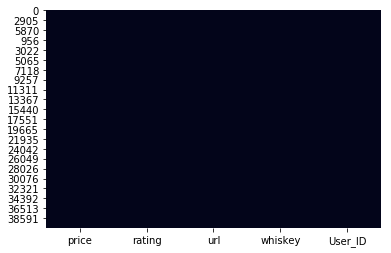

In [76]:
# Checking for empty columns
sns.heatmap(df5.isnull(), cbar=False)

In [54]:
df5.dropna(inplace=True)

/Users/hiowatah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
len(df5.user.value_counts())

1223

# Creating a group_id column to maintain user name privacy

In [63]:
df5['User_ID'] = df5.groupby('user').grouper.group_info[0]

/Users/hiowatah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/hiowatah/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Testing to see if a specific user has a consistent ID

In [64]:
df5[df5.user=='Yuxan'].head()

,price,rating,url,user,whiskey,User_ID
44,"€ 40500,00",95,https://www.whiskybase.com/whiskies/whisky/244...,Yuxan,laphroaig-1967-rwd,808
290,"€ 8999,00",99,https://www.whiskybase.com/whiskies/whisky/232...,Yuxan,laphroaig-1970-rwd,808
344,"€ 6373,75",98,https://www.whiskybase.com/whiskies/whisky/926...,Yuxan,springbank-100-proof,808
551,"€ 4616,93",96,https://www.whiskybase.com/whiskies/whisky/251...,Yuxan,glenfarclas-1958-sv,808
583,"€ 2440,00",98,https://www.whiskybase.com/whiskies/whisky/176...,Yuxan,caol-ila-1968-rwd,808


In [65]:
df5.User_ID.describe()

count    41157.000000
mean       563.068931
std        345.489910
min          0.000000
25%        268.000000
50%        548.000000
75%        852.000000
max       1222.000000
Name: User_ID, dtype: float64

In [66]:
# Dropping Usernames after getting the unique user_ids
df5.drop(columns=['user'], inplace=True)

In [67]:
df5.head()

,price,rating,url,whiskey,User_ID
0,"€ 50,88",88,https://www.whiskybase.com/whiskies/whisky/128...,1770-glasgow-single-malt,852
3,"€ 50,88",87,https://www.whiskybase.com/whiskies/whisky/128...,1770-glasgow-single-malt,459
4,"€ 50,88",86,https://www.whiskybase.com/whiskies/whisky/128...,1770-glasgow-single-malt,1205
5,"€ 50,88",85,https://www.whiskybase.com/whiskies/whisky/128...,1770-glasgow-single-malt,547
7,"€ 50,88",84,https://www.whiskybase.com/whiskies/whisky/128...,1770-glasgow-single-malt,562


# Since we merged 2 different lists together, we believe there might be some overlap. So dropping duplicates to ensure we get rid of any overlap

In [73]:
df5.drop_duplicates(inplace=True)

/Users/hiowatah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
# Dropped 139 rows of data
df5.describe()

,rating,User_ID
count,41018.000000,41018.000000
mean,92.900556,562.449388
std,3.277837,345.370426
min,2.000000,0.000000
25%,92.000000,268.000000
50%,93.000000,548.000000
75%,95.000000,851.000000
max,100.000000,1222.000000


# Moving final dataframe to csv to begin making the Model

In [75]:
df5.to_csv('Final_DataFrame.csv')